<a href="https://colab.research.google.com/github/an1ruddh/ml/blob/main/cnn_on_cifa10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
single_image=x_train[0][1]

In [7]:
single_image


array([[ 16,  20,  20],
       [  0,   0,   0],
       [ 18,   8,   0],
       [ 51,  27,   8],
       [ 88,  51,  21],
       [120,  82,  43],
       [128,  89,  45],
       [127,  86,  44],
       [126,  87,  50],
       [116,  79,  44],
       [106,  70,  37],
       [101,  67,  35],
       [105,  70,  36],
       [113,  74,  35],
       [109,  70,  33],
       [112,  72,  37],
       [119,  79,  44],
       [109,  71,  33],
       [105,  69,  27],
       [125,  89,  46],
       [127,  92,  46],
       [122,  85,  39],
       [131,  89,  47],
       [124,  82,  41],
       [121,  79,  37],
       [131,  89,  48],
       [132,  91,  53],
       [133,  94,  58],
       [133,  96,  60],
       [123,  88,  55],
       [119,  83,  50],
       [122,  87,  57]], dtype=uint8)

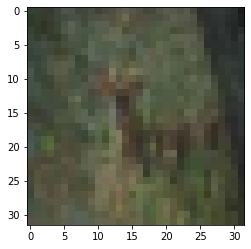

In [8]:
plt.imshow(x_train[10])

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_example= to_categorical(y_train)

In [13]:
y_example.shape

(50000, 10)

In [14]:
y_cat_test = to_categorical(y_test,10)

In [15]:
y_cat_train=to_categorical(y_train,10)

In [16]:
single_image

array([[ 16,  20,  20],
       [  0,   0,   0],
       [ 18,   8,   0],
       [ 51,  27,   8],
       [ 88,  51,  21],
       [120,  82,  43],
       [128,  89,  45],
       [127,  86,  44],
       [126,  87,  50],
       [116,  79,  44],
       [106,  70,  37],
       [101,  67,  35],
       [105,  70,  36],
       [113,  74,  35],
       [109,  70,  33],
       [112,  72,  37],
       [119,  79,  44],
       [109,  71,  33],
       [105,  69,  27],
       [125,  89,  46],
       [127,  92,  46],
       [122,  85,  39],
       [131,  89,  47],
       [124,  82,  41],
       [121,  79,  37],
       [131,  89,  48],
       [132,  91,  53],
       [133,  94,  58],
       [133,  96,  60],
       [123,  88,  55],
       [119,  83,  50],
       [122,  87,  57]], dtype=uint8)

In [17]:
x_train =  x_train/255

In [18]:
x_test = x_test/255

In [19]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [23]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=2) 

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 17s 5ms/step - loss: 1.5078 - accuracy: 0.4552 - val_loss: 1.2559 - val_accuracy: 0.5510
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1643 - accuracy: 0.5886 - val_loss: 1.1498 - val_accuracy: 0.5952
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0176 - accuracy: 0.6443 - val_loss: 1.0508 - val_accuracy: 0.6439
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9002 - accuracy: 0.6868 - val_loss: 0.9876 - val_accuracy: 0.6539
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8140 - accuracy: 0.7175 - val_loss: 0.9885 - val_accuracy: 0.6610
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7336 - accuracy: 0.7442 - val_loss: 0.9937 - val_accuracy: 0.6697


In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9937 - accuracy: 0.6697


[0.9937382936477661, 0.669700026512146]

In [31]:
from sklearn.metrics import classification_report

In [35]:
preds = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 2ms/step


In [37]:
print(classification_report(y_cat_test,preds))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1000
           1       0.86      0.77      0.81      1000
           2       0.65      0.52      0.58      1000
           3       0.52      0.45      0.48      1000
           4       0.71      0.48      0.57      1000
           5       0.64      0.45      0.53      1000
           6       0.84      0.66      0.74      1000
           7       0.86      0.60      0.71      1000
           8       0.86      0.68      0.76      1000
           9       0.87      0.61      0.72      1000

   micro avg       0.76      0.59      0.66     10000
   macro avg       0.76      0.59      0.66     10000
weighted avg       0.76      0.59      0.66     10000
 samples avg       0.59      0.59      0.59     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
my_img =  x_test[16]



In [39]:
my_img

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

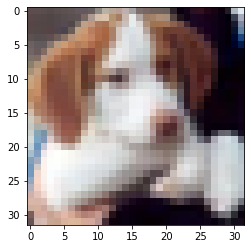

In [47]:
plt.imshow(my_img)

In [46]:
np.argmax(model.predict(my_img.reshape(1,32,32,3)),axis=1)

1/1 [==============================] - 0s 17ms/step


array([5])